### Keras is a high-level neural network API, written in Python.
#### It is designed to simplify the process of building deep learning models by providing an easy-to-use interface. Keras allows you to define neural networks with just a few lines of code, abstracting away many of the complexities involved in using lower-level libraries like TensorFlow. Think of Keras as the user-friendly interface or the "wrapper" around TensorFlow. It makes it easier to experiment and prototype with deep learning models.
### Here’s another analogy:
#### Keras is like a remote control for the TensorFlow toolbox. It makes it simpler to use
#### TensorFlow’s power without dealing with all the fine details.

### Steps:
#### 1. Import necessary libraries.
#### 2. Prepare the data (split into training and testing sets).
#### 3. Build the model (define input, hidden, and output layers).
#### 4. Compile the model (set optimizer, loss function, and metrics).
#### 5. Train the model.
#### 6. Evaluate the model.
### Let’s start by building and training the model.
### Let's build a simple neural network using Keras. We'll use the Sequential model, which is a linear stack of layers.

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [4]:
# Generate a simple binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential([Dense(16, activation='relu', input_shape=(X_train.shape[1],)), #Input layer
Dense(8, activation='relu'), #Hidden layer
Dense(1, activation='sigmoid') #Output layer (binary classification)
])
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5083 - loss: 0.7682 - val_accuracy: 0.5688 - val_loss: 0.7174
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5983 - loss: 0.6582 - val_accuracy: 0.6250 - val_loss: 0.6483
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6185 - loss: 0.6259 - val_accuracy: 0.6562 - val_loss: 0.6048
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7041 - loss: 0.5618 - val_accuracy: 0.6938 - val_loss: 0.5700
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7054 - loss: 0.5605 - val_accuracy: 0.7563 - val_loss: 0.5383
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7747 - loss: 0.4938 - val_accuracy: 0.7688 - val_loss: 0.5065
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7951 - loss: 0.4725 - val_accuracy: 0.7812 - val_loss: 0.4785
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8018 - loss: 0.4495 - val_accuracy: 0.8125 - val_loss: 0.4537
Epo

In [6]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7782 - loss: 0.4758 
Test Loss: 0.45406603813171387
Test Accuracy: 0.7950000166893005


#### To understand how the model is performing over time, let's plot the training and validation loss and accuracy across epochs.

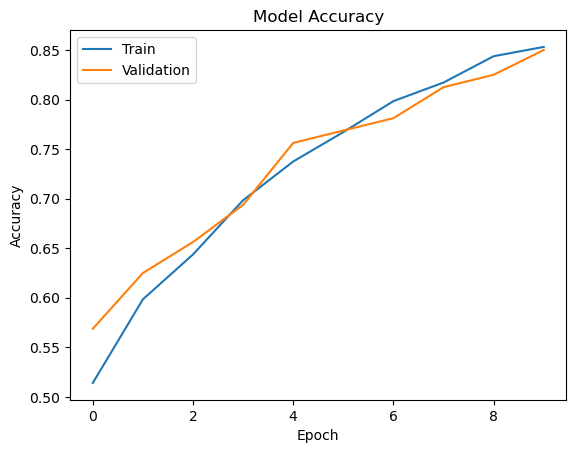

In [9]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### • Training Accuracy Line: Represents how well the model is doing on the training dataset after each epoch.
### • Validation Accuracy Line: Represents how well the model is doing on the validation dataset, which is separate data used to test the model during training.
### Evaluating the graph:
#### • Training and validation lines should follow similar trends. Both should rise and plateau, with training accuracy slightly higher.
#### • Validation accuracy should not diverge too much from training accuracy. A small gap is normal, but a large gap suggests overfitting.
#### • If validation accuracy plateaus early, consider tuning hyperparameters. This might involve changing the learning rate, adding layers, or modifying the model architecture.
### Insights for Graph Interpretations:
#### 1. Healthy Graph: Training and validation lines rise together, with training slightly above validation, both stabilizing at similar values. The model learns effectively and generalizes well without significant overfitting or underfitting.
#### 2. Overfitting: Training accuracy increases sharply, nearing 100%, while validation accuracy plateaus or declines, indicating the model is memorizing the training data.
#### Address this with regularization, more data, or simplifying the model.
#### 3. Underfitting: Both accuracies remain low and close together, showing the model is too simple or undertrained to capture patterns. Fix this by increasing model complexity, training longer, or reducing regularization.

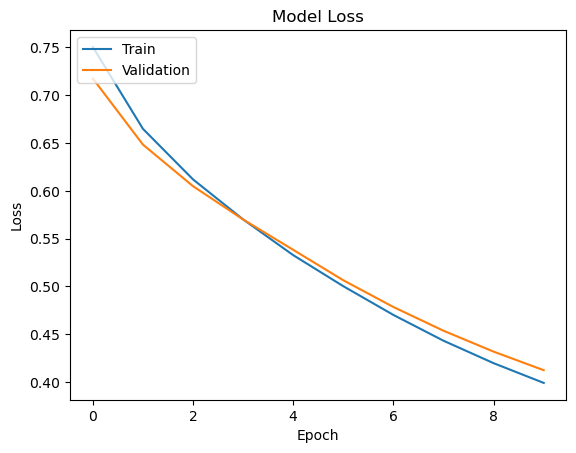

In [14]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Explanation for Loss vs. Epoch Graphs:
#### 1. Healthy Graph: Training and validation loss decrease together, staying close.Indicates effective learning and good generalization without overfitting or underfitting.
#### 2. Overfitting: Training loss drops steadily, but validation loss plateaus or increases.Suggests memorization of training data. Mitigate with regularization, early stopping, or simpler models.
#### 3. Underfitting: Both losses remain high and decrease very slowly. Implies the model is too simple or inadequately trained. Address by adding complexity, training longer,or improving data preprocessing.
#### 4. Validation Loss Fluctuates: Training loss decreases, but validation loss oscillates.May result from noise or insufficient validation data. Use larger datasets or techniques like data augmentation to stabilize.Now that the model is trained, we can use it to make predictions on new, unseen data. Let’s see how to predict the class labels for our test data. Loss measures the "error" in predictions, guiding the model during training to improve its performance. It acts as the foundation for optimizing weights and ensuring the model learns meaningful patterns from the data.

#### Loss measures the "error" in predictions, guiding the model during training to improve its performance. It acts as the foundation for optimizing weights and ensuring the model learns meaningful patterns from the data.
#### model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#### • loss function is setup when the model is compiled
#### • sparse_categorical_crossentropy is used for multi-class classification problems.
#### • we can use various other loss functions too


In [19]:
test_loss, test_accuracy = model.evaluate(X, y)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.8516 - loss: 0.3979
Test Loss: 0.4055735468864441
Test Accuracy: 0.8420000076293945


## Loss Functions in Deep Learning
### • sparse_categorical_crossentropy: For multi-class classification with integer labels; calculates the cross-entropy between true labels and predicted probabilities.
### • categorical_crossentropy: For multi-class classification with one-hot encoded labels; computes cross-entropy for each class.
### • binary_crossentropy: For binary classification; measures the log loss for two classes.
### • mean_squared_error (MSE): For regression; computes the squared difference between predicted and true values.
### • mean_absolute_error (MAE): For regression; computes the absolute difference between predictions and targets.
### • huber_loss: For regression; combines MSE and MAE, robust to outliers.
### • mean_absolute_percentage_error (MAPE): For regression; calculates the percentage difference between predictions and actual values.
### • hinge: For binary classification with labels -1 and 1; used in SVMs, penalizes misclassified samples.
### • squared_hinge: Variation of hinge loss; penalizes the square of hinge loss for misclassifications.
### • poisson: For count-based data; computes the Poisson deviance between true and predicted values.
### • cosine_similarity: Measures the cosine similarity between true and predicted vectors; useful for directional data.
### • log_cosh: For regression; similar to MSE but less sensitive to large errors.
### • kullback_leibler_divergence (KLD): Measures divergence between two probability distributions, true and predicted.
### • custom_loss: User-defined function tailored to specific requirements in a model.